# Fine Grained Visual Recognization of Sanskrit Script Using Augmented One-Shot Learning

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os
print(os.listdir("C:/Users/HP/Desktop/Sanskrit123/"))


['Sanskrit_test', 'Sanskrit_train']


## 1.Load and Organize Data
Here we load and organize the data so we can easily use it inside of Keras models

In [2]:
character_list=[]
image_name_list=[]
path_list=[]
basic_path="C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train/"
for character in os.listdir(basic_path):
    for image_name in os.listdir(basic_path+"/"+character):
            path=basic_path+"/"+character+"/"+image_name
            image_name_list.append(image_name)
            character_list.append(character)
            path_list.append(path)
            

In [3]:
image_name_list = pd.Series(image_name_list)
character_list= pd.Series(character_list)
path_list = pd.Series(  path_list)
df=pd.DataFrame()
df["character"]=character_list
df["image_name"]=image_name_list
df["path"]= path_list 
df.head(5)

,character,image_name,path
0,character01,0851_01.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train...
1,character01,0851_02.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train...
2,character01,0851_03.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train...
3,character01,0851_04.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train...
4,character01,0851_05.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_train...


In [4]:
character_list=[]
image_name_list=[]
path_list=[]
basic_path="C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/"
for character in os.listdir(basic_path):
        for image_name in os.listdir(basic_path+"/"+character):
            path=basic_path+"/"+character+"/"+image_name
            image_name_list.append(image_name)
            character_list.append(character)
            path_list.append(path)

In [5]:
image_name_list = pd.Series(image_name_list)
character_list= pd.Series(character_list)
path_list = pd.Series(  path_list)
Sanskrit_test_df=pd.DataFrame()
Sanskrit_test_df["character"]=character_list
Sanskrit_test_df["image_name"]=image_name_list
Sanskrit_test_df["path"]= path_list 
Sanskrit_test_df.head(5)

,character,image_name,path
0,character01,0951_01.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/...
1,character01,0951_02.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/...
2,character01,0951_03.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/...
3,character01,0951_04.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/...
4,character01,0951_05.png,C:/Users/HP/Desktop/Sanskrit123/Sanskrit_test/...


In [6]:
df['exists'] = df['path'].map(os.path.exists)
Sanskrit_test_df['exists'] = Sanskrit_test_df['path'].map(os.path.exists)
print("Training Dataframe Length",len(df))
print("testing Dataframe length",len(Sanskrit_test_df))
print("\n\n\n")

print("Training Dataframe Length where images = true",len(df[df.exists == True]))
print("Testing Dataframe Length where images = true",len(Sanskrit_test_df[Sanskrit_test_df.exists == True]))

Training Dataframe Length 498
testing Dataframe length 100




Training Dataframe Length where images = true 498
Testing Dataframe Length where images = true 100


In [7]:
X_train=[]
y_train=[]

for i in range (0,len(df)):
    img=plt.imread(df.path.iloc[i])
    X_train.append(img)
    y_train.append(df.character.iloc[i])

X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
print("X Train shape",X_train.shape)
print("Y Train shape",y_train.shape)


X Train shape (498, 105, 105)
Y Train shape (498,)


In [8]:
X_test=[]
y_test=[]
for i in range (0,len(Sanskrit_test_df)):
    img=plt.imread(Sanskrit_test_df.path.iloc[i])
    X_test.append(img)
    y_test.append(Sanskrit_test_df.character.iloc[i])

X_test=np.asarray(X_test)
y_test=np.asarray(y_test)
print("Y test shape",y_test.shape)
print("X_test shape",X_test.shape)

Y test shape (100,)
X_test shape (100, 105, 105)


In [9]:
X_train=X_train.reshape(X_train.shape[0],105,105,1)
X_test=X_test.reshape(X_test.shape[0],105,105,1)
train_groups = [X_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [X_test[np.where(y_test==i)[0]] for i in np.unique(y_test)]
print('train groups:', [X.shape[0] for X in train_groups])
print('test groups:', [X.shape[0] for X in test_groups])

train groups: [199, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
test groups: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


(105, 105, 1)
(105, 105)


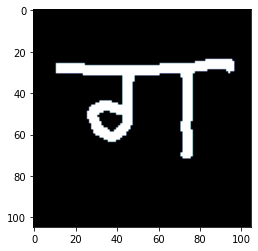

In [14]:
w=train_groups[3][12][:,:,0]
plt.imshow(w,'bone_r')
print(train_groups[3][12].shape)
print(w.shape)

## 2.Batch Generation


In [16]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1]*batch_halfsize
        else:
            
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize
            
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

In [17]:
print("Training set language",len(df.character.value_counts()))
print("Testing set language",len(Sanskrit_test_df.character.value_counts()))

Training set language 21
Testing set language 20


In [18]:
def generate_one_hot_encoding(classes):
    encoder = LabelBinarizer()
    transfomed_labels = encoder.fit_transform(classes)
    return transfomed_labels
df_character=df.character
Sanskrit_test_language=Sanskrit_test_df.character
labels = generate_one_hot_encoding(df_character)
Sanskrit_test_labels=generate_one_hot_encoding(Sanskrit_test_language)

print("length of labels",len(labels))
print("length of Evaluation_labels",len(Sanskrit_test_labels))

length of labels 498
length of Evaluation_labels 100


## 3.Validate Data
Here we make sure the generator is doing something sensible, we show the images and their similarity
percentage.

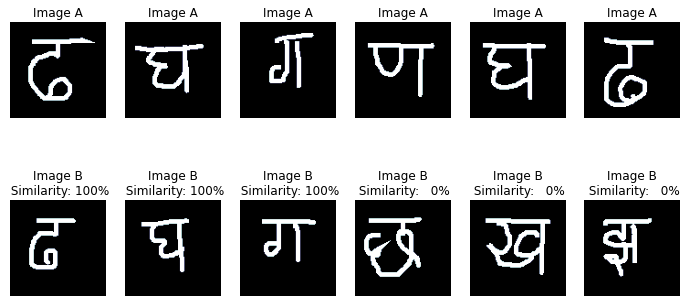

In [21]:
X_train=X_train.reshape(X_train.shape[0],105,105,1)
X_test=X_test.reshape(X_test.shape[0],105,105,1)
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6),)
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0],'bone_r')
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0],'bone_r')
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')

## 4.Let's define our model now

In [15]:
from keras.models import Sequential
import time
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
from keras.engine.topology import Layer
from keras import backend as K
from keras.regularizers import l2
K.set_image_data_format('channels_last')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf

import numpy.random as rng
from sklearn.utils import shuffle


## 4:1.Feature Generation
Here we make the feature generation network to process images into features 
and network will be trained to generate useful vector features from input images.

In [22]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
img_in = Input(shape = X_train.shape[1:], name = 'FeatureNet_ImageInput')
n_layer = img_in
for i in range(2):
    n_layer = Conv2D(8*2**i, kernel_size = (3,3), activation = 'relu')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = Conv2D(16*2**i, kernel_size = (3,3), activation = 'relu')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = MaxPool2D((2,2))(n_layer)
n_layer = Flatten()(n_layer)
n_layer = Dense(32, activation = 'linear')(n_layer)
n_layer = Dropout(0.5)(n_layer)
n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
feature_model.summary()

Model: "FeatureGenerationModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FeatureNet_ImageInput (Input [(None, 105, 105, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 103, 103, 8)       80        
_________________________________________________________________
batch_normalization (BatchNo (None, 103, 103, 8)       32        
_________________________________________________________________
activation (Activation)      (None, 103, 103, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 101, 101, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 101, 101, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 101, 101

## 4:2.Siamese Model
We apply the feature generating model to both images and then combine them together to predict if they are
similar or not. 

In [23]:
from keras.layers import concatenate
img_a_in = Input(shape = X_train.shape[1:], name = 'ImageA_Input')
img_b_in = Input(shape = X_train.shape[1:], name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(64, activation = 'relu')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(32, activation = 'relu')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
ImageB_Input (InputLayer)       [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
FeatureGenerationModel (Functio (None, 32)           550352      ImageA_Input[0][0]               
                                                                 ImageB_Input[0][0]               
__________________________________________________________________________________________________
merge_features (Concatenate)    (None, 64)           0           FeatureGenerationM

In [24]:
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 5.Visual Model Feedback
Here we visualize what the model does by taking a small sample of randomly selected A and B images the first
half from the same category and the second from different categories.

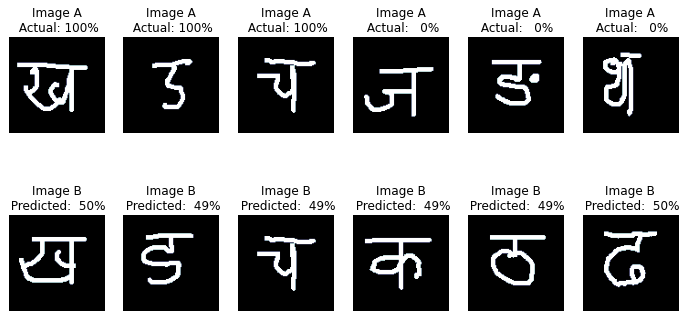

In [25]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0],'bone_r')
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0],'bone_r')
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig

_ = show_model_output()

In [26]:
# make a generator out of the data
def siam_gen(in_groups, batch_size = 30):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        yield [pv_a, pv_b], pv_sim
valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit_generator(siam_gen(train_groups), 
                               steps_per_epoch = 500,
                               validation_data=([valid_a, valid_b], valid_sim),
                                              epochs = 10,
                                             verbose = True)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 1141s 2s/step - loss: 0.7635 - accuracy: 0.5041 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 2/10
500/500 [==============================] - 1027s 2s/step - loss: 0.6978 - accuracy: 0.5275 - val_loss: 0.7083 - val_accuracy: 0.4937
Epoch 3/10
500/500 [==============================] - 959s 2s/step - loss: 0.6449 - accuracy: 0.6195 - val_loss: 0.6723 - val_accuracy: 0.5620
Epoch 4/10
500/500 [==============================] - 951s 2s/step - loss: 0.5458 - accuracy: 0.7249 - val_loss: 0.5709 - val_accuracy: 0.7051
Epoch 5/10
500/500 [==============================] - 988s 2s/step - loss: 0.4945 - accuracy: 0.7643 - val_loss: 0.5432 - val_accuracy: 0.7358
Epoch 6/10
500/500 [==============================] - 963s 2s/step - loss: 0.4892 - accuracy: 0.7701 - val_loss: 0.5483 - val_accuracy: 0.7402
Epoch 7/10
500/500 [==============================] - 1124s 2s/step - loss: 0.4678 - accuracy: 0.7849 - val_loss: 0.4748 - val_accuracy: 0.7

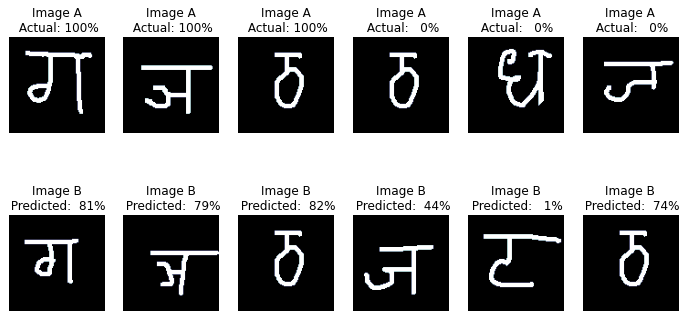

In [27]:
_ = show_model_output()

## 6.Performance of Network

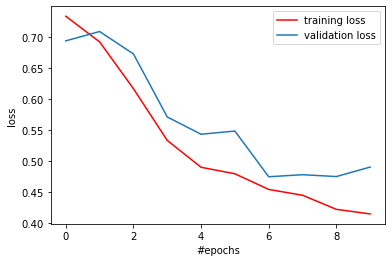

In [28]:
from matplotlib import pyplot as plt
plt.plot(loss_history.history['loss'],'r',label='training loss')
plt.plot(loss_history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

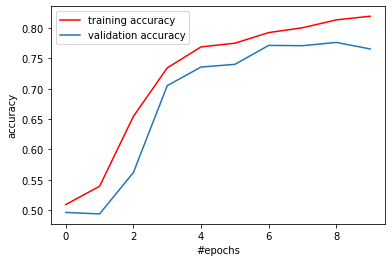

In [29]:
plt.plot(loss_history.history['accuracy'],'r',label='training accuracy')
plt.plot(loss_history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()